<a href="https://colab.research.google.com/github/fahmidjobbi/back-pepolls/blob/main/ScrapReddit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install praw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install asyncpraw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import praw
import pandas as pd
import json

# Create a PRAW object with the authentication information
reddit = praw.Reddit(client_id='jV5Swj8B8Hh2fMOjJa--gg',
                     client_secret='L7a3XXIK0WYYFRghTkm5vB4FAX-EJA',
                     username='Valuable_Employer434',
                     password='yamounadada',
                     user_agent='my_bot/0.0.1')

# List of subreddits to scrape
subreddits = ['news', 'entertainment', 'gaming', 'sports',
              'science', 'health', 'memes']

# Initialize a list to store the post data
posts_list = []

# Iterate over the subreddits
for subreddit_name in subreddits:
    # Get the subreddit object from the subreddit name
    subreddit = reddit.subreddit(subreddit_name)

    # Get the posts from the subreddit
    posts = subreddit.top(limit=None)

    # Iterate over the posts and extract the desired data
    for post in posts:
        # Check if the post has non-empty text
        if post.selftext != '':
            # Add the post title, text, and subreddit to the list
            posts_list.append([post.title, post.selftext, subreddit_name])

# Convert the list to a Pandas dataframe
all_posts_df = pd.DataFrame(posts_list, columns=['Title', 'Post Text', 'Subreddit'])

# Save the dataframe to a CSV file
filepath = 'reddit_posts.csv'
all_posts_df.to_csv(filepath, index=False)

print(f"The data has been saved to {filepath}")


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



KeyboardInterrupt: ignored

In [ ]:
# List of subreddits to scrape
subreddits = ['r/news',
    'r/worldnews',
    'r/politics',
    'r/technology',
    'r/science',
    'r/aww',
    'r/gifs',
    'r/memes',
    'r/AskReddit',
    'r/movies',
    'r/music',
    'r/books',
    'r/gaming',
    'r/sports',
    'r/food',
    'r/travel',
    'r/fitness',
    'r/history',
    'r/personalfinance',
    'startups_posts']

In [ ]:
import asyncio
import pandas as pd
import asyncpraw

async def fetch_posts(reddit, subreddit_name, limit):
    # Get the subreddit object from the subreddit name
    subreddit = await reddit.subreddit(subreddit_name)
    # Initialize a list to store the post data
    posts_list = []
    # Fetch the posts from the subreddit in batches of 1000
    for i in range(0, limit, 1000):
        posts = subreddit.top(limit=1000, params={"after": f"{i}"})
        # Iterate over the posts and extract the desired data
        async for post in posts:
            # Check if the post has non-empty text
            if post.selftext != '':
                # Add the post title and text to the list
                posts_list.append({'Title': post.title, 'Post Text': post.selftext, 'Subreddit': subreddit_name})
    # Return the list of post data
    return posts_list


async def main():
    # Create a PRAW object with the authentication information
    reddit = asyncpraw.Reddit(client_id='jV5Swj8B8Hh2fMOjJa--gg',
                              client_secret='L7a3XXIK0WYYFRghTkm5vB4FAX-EJA',
                              username='Valuable_Employer434',
                              password='yamounadada',
                              user_agent='my_bot/0.0.1')
    # List of subreddits to scrape
    subreddits = ['startup','family','books','anime','announcements']
    # Initialize a list to store the post data
    all_posts_list = []
    # Set the maximum number of posts to retrieve per subreddit
    limit = 10000
    # Fetch the posts from each subreddit concurrently and append them to the list
    coroutines = [fetch_posts(reddit, subreddit_name, limit) for subreddit_name in subreddits]
    results = await asyncio.gather(*coroutines)
    for posts_list in results:
        all_posts_list.extend(posts_list)
    # Convert the list of post data to a Pandas dataframe
    all_posts_df = pd.DataFrame(all_posts_list, columns=['Title', 'Post Text', 'Subreddit'])
    # Save the dataframe to a CSV file
    filepath = 'reddit_posts.csv'
    all_posts_df.to_csv(filepath, index=False)
    print(f"The data has been saved to {filepath}")

# Run the main coroutine
asyncio.run(main())


ERROR:asyncio:Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x7f1ceb5dcdc0>


The data has been saved to reddit_posts.csv


In [ ]:
import asyncio
import pandas as pd
import asyncpraw
import nest_asyncio
nest_asyncio.apply()

async def fetch_posts(reddit, subreddit_name, limit):
    # Get the subreddit object from the subreddit name
    subreddit = await reddit.subreddit(subreddit_name)
    # Initialize a list to store the post data
    posts_list = []
    # Fetch the posts from the subreddit using pagination
    after = None
    while len(posts_list) < limit:
        posts = subreddit.top(limit=1000, params={"after": after})

        # Iterate over the posts and extract the desired data
        async for post in posts:
            # Check if the post has non-empty text
            if post.selftext != '':
                # Add the post title and text to the list
                posts_list.append({'Title': post.title, 'Post Text': post.selftext, 'Subreddit': subreddit_name})
                # Check if the limit has been reached
                if len(posts_list) == limit:
                    break
        # Check if there are more posts to fetch
        if len(posts_list) < limit and posts.params.get("after"):
            after = posts.params["after"]
        else:
            break
    # Return the list of post data
    return posts_list


async def main():
    # Create a PRAW object with the authentication information
    reddit = asyncpraw.Reddit(client_id='jV5Swj8B8Hh2fMOjJa--gg',
                              client_secret='L7a3XXIK0WYYFRghTkm5vB4FAX-EJA',
                              username='Valuable_Employer434',
                              password='yamounadada',
                              user_agent='my_bot/0.0.1')
    # List of subreddits to scrape
    subreddits = ['anime']
    # Initialize a list to store the post data
    all_posts_list = []
    # Set the maximum number of posts to retrieve per subreddit
    limit = 1000
    # Fetch the posts from each subreddit concurrently and append them to the list
    coroutines = [fetch_posts(reddit, subreddit_name, limit) for subreddit_name in subreddits]
    results = await asyncio.gather(*coroutines)
    for posts_list in results:
        all_posts_list.extend(posts_list)
    # Convert the list of post data to a Pandas dataframe
    all_posts_df = pd.DataFrame(all_posts_list, columns=['Title', 'Post Text', 'Subreddit'])
    # Save the dataframe to a CSV file
    filepath = 'reddit_posts.csv'
    all_posts_df.to_csv(filepath, index=False)
    print(f"The data has been saved to {filepath}")


# Check if there is already an event loop running in the current thread
if asyncio.get_event_loop().is_running():
    # If there is, use run_coroutine_threadsafe() to run the coroutine in the main thread's event loop
    loop = asyncio.get_event_loop()
    future = asyncio.run_coroutine_threadsafe(main(), loop)
    future.result()
else:
    # If there isn't, use asyncio.run() to run the coroutine in the current event loop
    asyncio.run(main())


In [ ]:
df = pd.read_csv('/content/reddit_posts.csv')
df

,Title,Post Text,Subreddit
0,VVTokens: Financial Services More Accessible,The​ ​Token​ ​to Make Electronic Financial Ser...,startup
1,We just raised USD 30M to make Contra the plat...,https://www.reddit.com/r/startups/comments/lqp...,startup
2,I built a website that teaches anyone who has ...,I've been working with all kinds of early-stag...,startup
3,"We made $2,5M with content marketing",This is a true story!\n\nThe backbone of our c...,startup
4,After more than a year of design & coding we l...,Logology ([https://www.logology.co](https://ww...,startup
...,...,...,...
25175,Adding r/baseball as a default community for t...,The baseball postseason is already underway! A...,announcements
25176,Sunsetting Secret Santa and Reddit Gifts,Today is a difficult one:. 2021 will be the la...,announcements
25177,New addition to site-wide rules regarding the ...,Hello All—\n\nWe want to let you know that we ...,announcements
25178,"Debate, dissent, and protest on Reddit",Hey everyone–\n\nThe pandemic has been extreme...,announcements


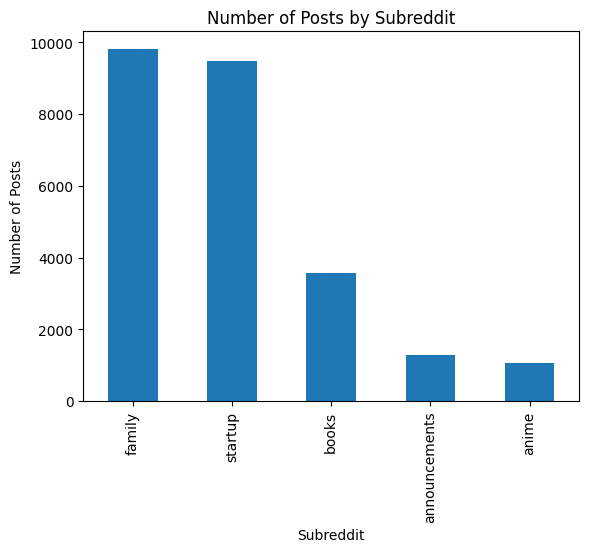

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a Pandas dataframe
df = pd.read_csv('reddit_posts.csv')

# Count the number of posts in each subreddit
counts = df['Subreddit'].value_counts()

# Plot a bar chart of the counts
fig, ax = plt.subplots()
counts.plot(kind='bar', ax=ax)

# Set the chart title and axis labels
ax.set_title('Number of Posts by Subreddit')
ax.set_xlabel('Subreddit')
ax.set_ylabel('Number of Posts')

# Show the plot
plt.show()
